# Basics of plotting in Python
### By our guest speaker Giacomo Sommani ([giacomo.sommani@rub.de](giacomo.sommani@rub.de))
### 16/12/2022

In [2]:
# We will study mainly this library, matplotlib.pyplot. 
# You can find all the documentation on https://matplotlib.org

import matplotlib.pyplot as plt

## My first plot

In [2]:
# First, we define two lists (they could be tuples, or arrays, nothing changes)

x_0 = [0,1,2,3]  # List for the x-axis
y_0 = [3,4,1,5]  # List for the y-axis

We are ready for a first plot. Precisely, a scatter plot, that you already met some lectures ago. The following is the most default way to do it. In this way also running a python script not in a notebook the plot will
be shown.

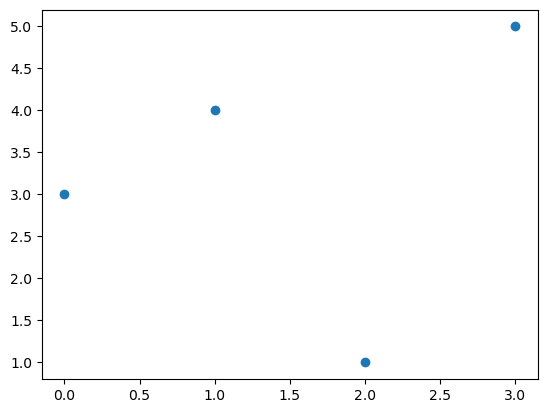

In [3]:
fig, ax = plt.subplots() # Creation of the figure and axis objects
ax.scatter(x_0, y_0)     # Scatter plot with the data (using the axis object)
plt.show()               # Command to order python to show the plot 
                         # (usually not necessary in notebooks)

But what are fig and ax? What are they for?<br>
fig is a Figure object and handles the plot's components (the main figure, the colorbar, the legend, etc.)<br>
ax handles the data relative to the plot.<br>
<br>
Using these two objects is not very immediate, but it can be very useful to learn how to properly handle them.

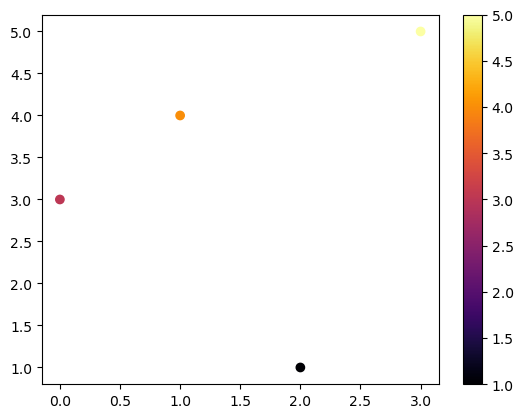

In [4]:
fig, ax = plt.subplots() 
sc = ax.scatter(x_0, y_0, c=y_0, cmap = 'inferno')  # The scatter attribute returns a path collection
                                                    # object. This encodes the information related to
                                                    # the plotted points. 'cmap' is the color map for
                                                    # the plot, the standard one is 'viridis'.
            
fig.colorbar(sc)    # The figure object handles the colorbar, but it needs the path collection object
                    # to build it.
    
plt.show()

### Exercise:

Find other color maps and see how they look like in the plot (the library is matplotlib)

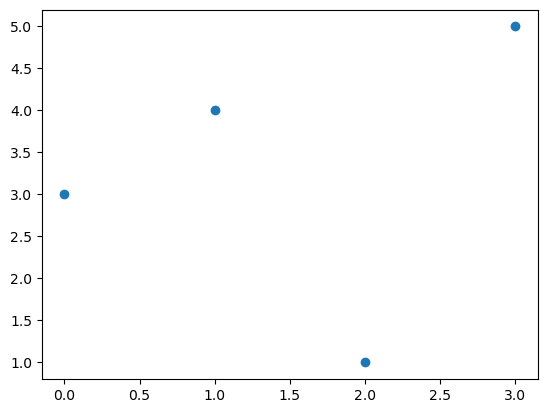

In [5]:
# Anyway, on a notebook we can much more rapidly do this.

plt.scatter(x_0,y_0)

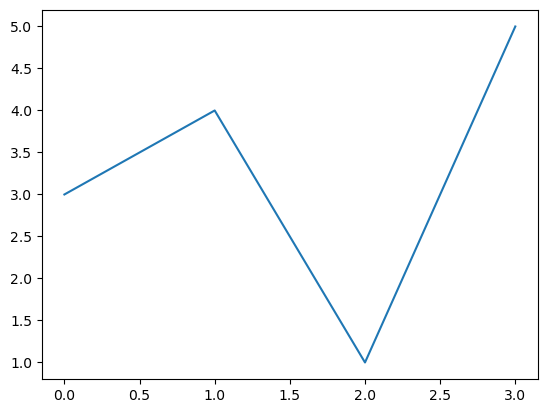

In [6]:
# But there is also the function plot:

plt.plot(x_0, y_0)

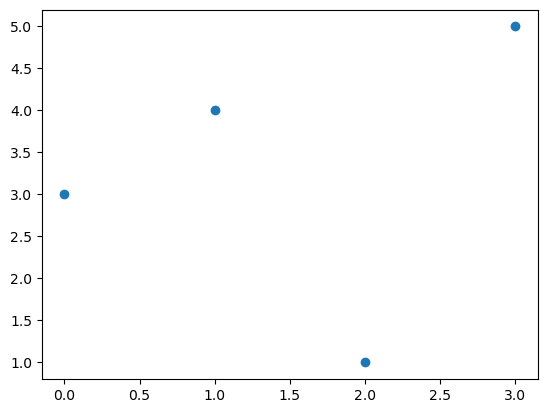

In [7]:
# It can be equivalent, I could do:

plt.plot(x_0, y_0, linestyle = '', marker = 'o')

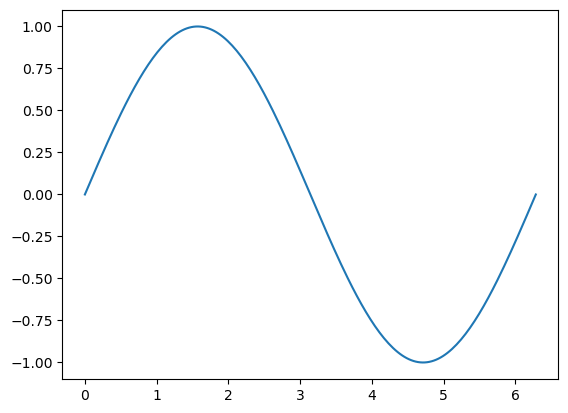

In [8]:
# Let's move on using arrays:

import numpy as np

x_1 = np.linspace(0, 2 * np.pi, 200)
y_1 = np.sin(x_1)

plt.plot(x_1,y_1)

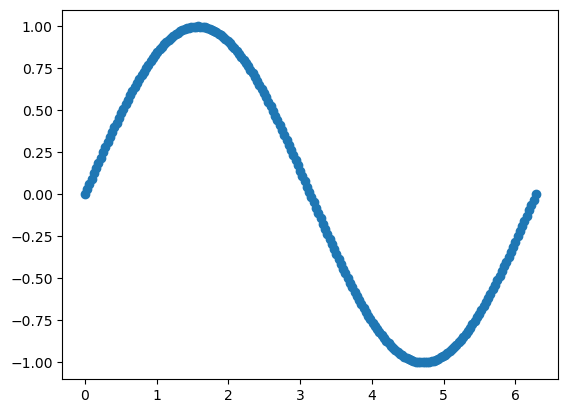

In [9]:
# How would a scatter plot look like?

plt.scatter(x_1,y_1)

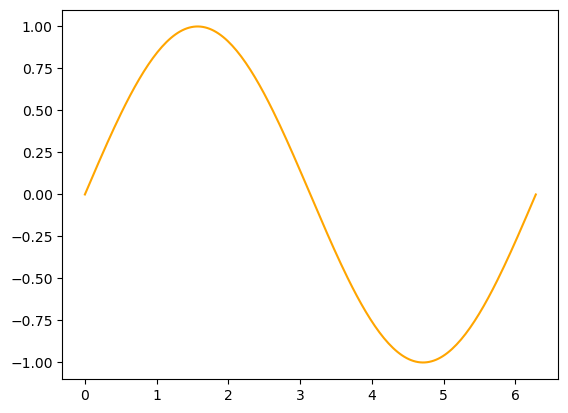

In [10]:
# How to change the color ?

plt.plot(x_1,y_1, color = 'orange')

Which are the colors that you can use? 

### Excercise: google it and draw the sinus of your favourite color!

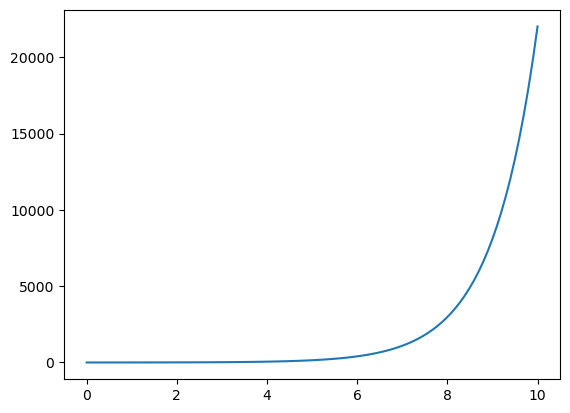

In [11]:
# let's draw an exponential function

x_2 = np.linspace(0,10,100)
y_2 = np.exp(x_2)

plt.plot(x_2,y_2)

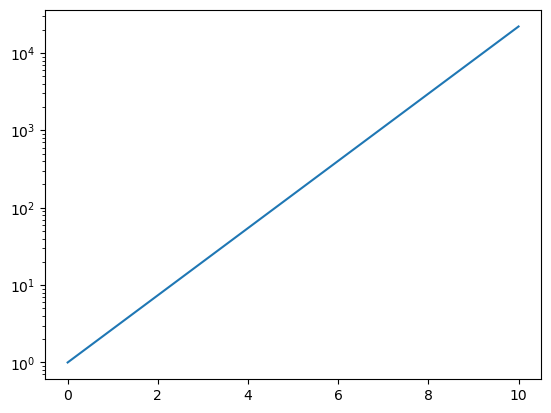

In [12]:
# It is also possible to plot with a logarithmic scale

plt.yscale('log')
plt.plot(x_2, y_2)

We would like now to improve moreover our plots. Nevertheless, to have interesting plots we need interesting data. So, let's create a very simple model of a covid19 pandemic.

In [13]:
# Function that, given a population, the number of positives,
# and the number of recovered persons, returns the new infected
# persons in one day.

def infect(n_pos,   # The number of positives from the precedent day 
           popul,   # The population (just for changing the index)
           index    # the index that regulates the growth of the pandemic.
          ):
    
    # If more than 1 person on 1000 is infected, the population
    # starts taking measures against the disease, so the index changes
    if n_pos > popul/1000: index = 1.12
    
    new_positives = int(n_pos*(index - 1))  # I write here how many new positives there are this day
    n_pos = int(n_pos * index)              # I write here how many positives there are this day
    
    return n_pos, new_positives, index      

In [14]:
days_number = 100  # Number of days that we want to explore
days = np.linspace(1,days_number,days_number)

popul = 5e7        # The population in our little experiment
n_pos = 10         # Number of positives at the start
index = 1.4        # Index of growth of the number of positives
n_healed = 0       # Recovered people at the start
healing_days = 8   # Required days to recovered from the disease

In [15]:
# We create some lists

pos_per_days = []     # The number of positives day by day
healed_per_days = []  # The number of how much people healed day by day
incr_pos_per_days = [] # new positives day by day
incr_healed_per_days = [] # new recovered day by day

In [16]:
# And let's run our experiment

for day in days:  # Explore the days singularly
    
    if day >= healing_days :  #Start healing only when enough days passed
        increment = incr_pos_per_days[int(day - healing_days - 1)]  # how many new positives there
                                                                    # where some days before?
        n_healed += increment   # increase the number of recovered persons
        n_pos -= increment      # and decrease the positives
    else: increment = 0         # If not enough days passed, there is no increase
            
    n_pos, new_positives, index = infect(n_pos, popul, index)  # Update the positives for the day
     
    # Update all the lists
    pos_per_days.append(n_pos)               
    incr_pos_per_days.append(new_positives)
    healed_per_days.append(n_healed)
    incr_healed_per_days.append(heal)

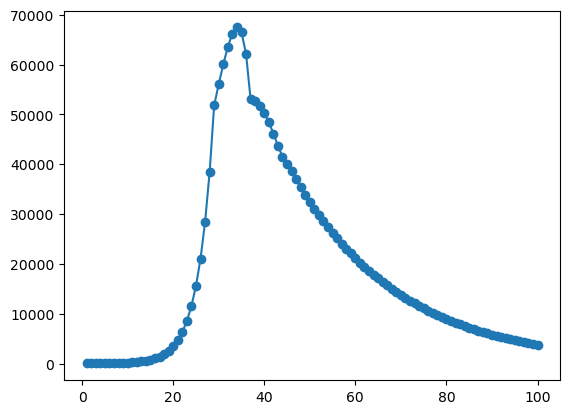

In [17]:
# Here the plot, it does not look too far from the actual waves!

plt.plot(days, pos_per_days, marker = 'o')

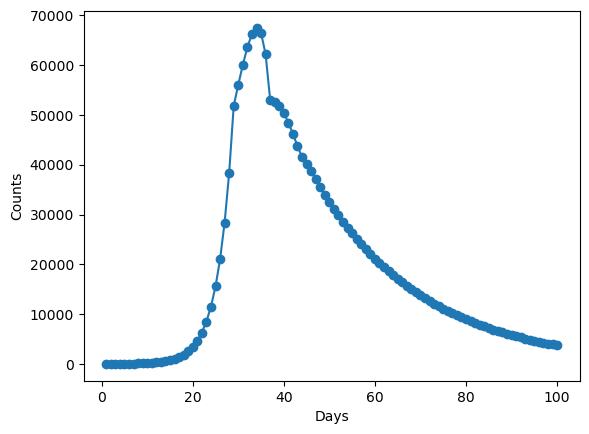

In [18]:
# To give more information, we can add some labels

plt.xlabel('Days')
plt.ylabel('Counts')

plt.plot(days, pos_per_days, marker = 'o')

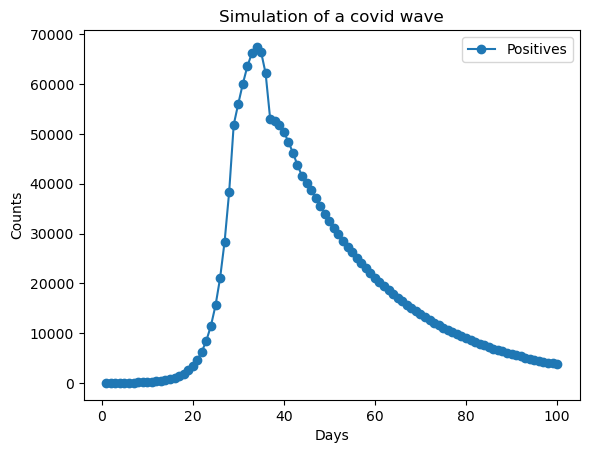

In [19]:
# We can also add a legend, and maybe a title

plt.title('Simulation of a covid wave')

plt.xlabel('Days')
plt.ylabel('Counts')

plt.plot(days, pos_per_days, marker = 'o', label = 'Positives')
plt.legend()

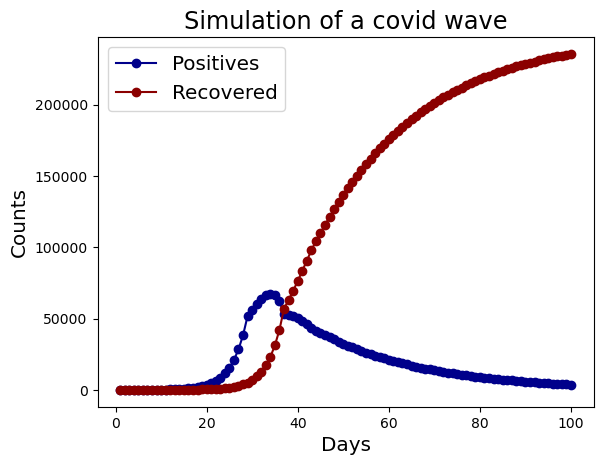

In [20]:
# We could also add the recovered, and do some other modifications

plt.title('Simulation of a covid wave', fontsize = 'xx-large') # I regulate the size of the text
                                                               # with fontsize

plt.xlabel('Days', fontsize = 'x-large')       # I regulate the size of the texrt with fontsize
plt.ylabel('Counts', fontsize = 'x-large')

plt.plot(days, pos_per_days, marker = 'o', label = 'Positives', color = 'darkblue')
plt.plot(days, healed_per_days, marker = 'o', label = 'Recovered', color = 'darkred')
plt.legend(fontsize = 'x-large')      # I regulate the size of the text with fontsize

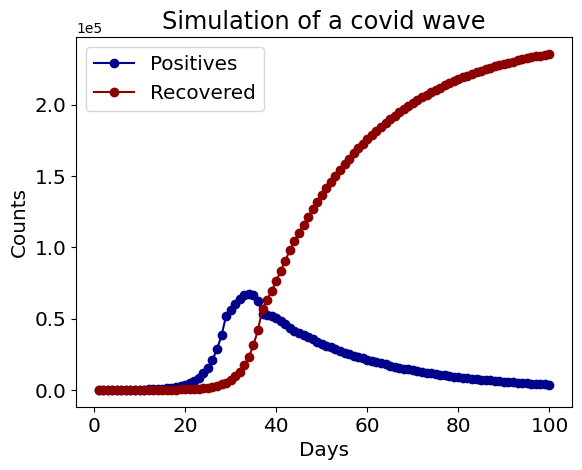

In [21]:
# We can also change the size of the ticks and switch to a scientific notation

plt.title('Simulation of a covid wave', fontsize = 'xx-large')

plt.ticklabel_format(style = 'scientific', # I precise the style I want
                     scilimits = [-5, 2],  # If the numbers have a power of 10 inside
                                           # these limits, the scientific notation is
                                           # not applied
                     axis = 'y')           # Specify which is the interested axis

plt.xticks(fontsize = 'x-large')   # Here I change the size of the ticks
plt.yticks(fontsize = 'x-large')

plt.xlabel('Days', fontsize = 'x-large')
plt.ylabel('Counts', fontsize = 'x-large')

plt.plot(days, pos_per_days, marker = 'o', label = 'Positives', color = 'darkblue')
plt.plot(days, healed_per_days, marker = 'o', label = 'Recovered', color = 'darkred')
plt.legend(fontsize = 'x-large')

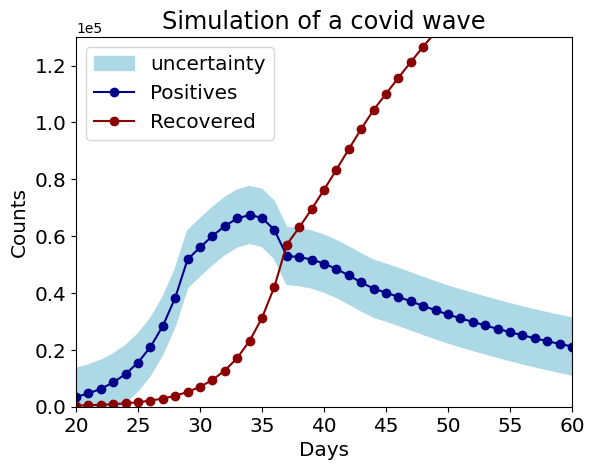

In [22]:
# We can also save our figure

plt.title('Simulation of a covid wave', fontsize = 'xx-large')

plt.ticklabel_format(style = 'scientific', scilimits = [-5, 2], axis = 'y')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.xlim(20, 60)      # I can change the range of the axis using xlim
plt.ylim(0, 1.3e5)
plt.xlabel('Days', fontsize = 'x-large')
plt.ylabel('Counts', fontsize = 'x-large')

#fill_between is the attribute that permits me to fill an area in the plot
plt.fill_between(days, # Specify the x-array to refere to
                 np.array(pos_per_days) + 1e4, np.array(pos_per_days) - 1e4, # The area inbetween
                                                                             # these two plots will be filled
                 color = 'lightblue',  
                 label = 'uncertainty') 

plt.plot(days, pos_per_days, marker = 'o', label = 'Positives', color = 'darkblue')
plt.plot(days, healed_per_days, marker = 'o', label = 'Recovered', color = 'darkred')


plt.legend(loc = 'upper left', fontsize = 'x-large')  # Using loc I can fix the position 
                                                      # of the legend

plt.savefig('covid_simulation')

### Excercise:

In the same plot draw an horizontal line that indicates the day with the highest number of positives

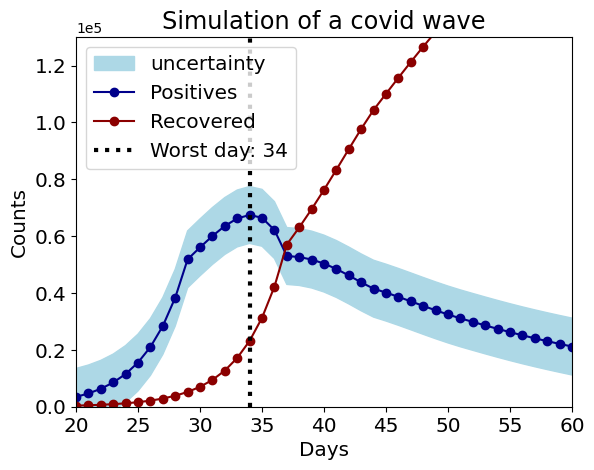

In [23]:
plt.title('Simulation of a covid wave', fontsize = 'xx-large')

plt.ticklabel_format(style = 'scientific', scilimits = [-5, 2], axis = 'y')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.xlim(20, 60) 
plt.ylim(0, 1.3e5)
plt.xlabel('Days', fontsize = 'x-large')
plt.ylabel('Counts', fontsize = 'x-large')


plt.fill_between(days, 
                 np.array(pos_per_days) + 1e4, np.array(pos_per_days) - 1e4,
                 color = 'lightblue',  
                 label = 'uncertainty') 

plt.plot(days, pos_per_days, marker = 'o', label = 'Positives', color = 'darkblue')
plt.plot(days, healed_per_days, marker = 'o', label = 'Recovered', color = 'darkred')

# This is how I can draw this line.
worst_day = days[np.argmax(pos_per_days)]
plt.axvline(worst_day, color = 'black', linestyle = 'dotted', linewidth = 3, 
            label = 'Worst day: '+str(int(worst_day))) 

plt.legend(loc = 'upper left', fontsize = 'x-large')  
plt.savefig('covid_simulation')

# Histograms

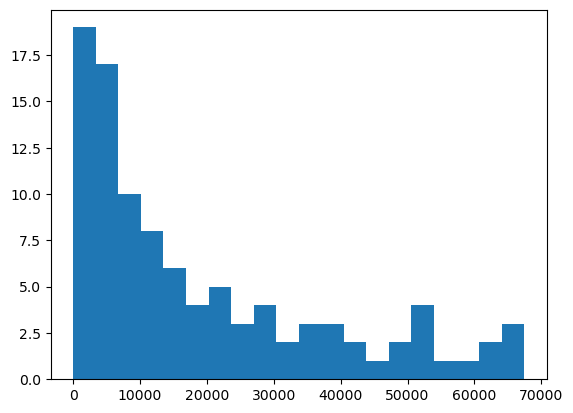

In [24]:
# Another important instrument: the histogram, simply performed with plt.hist()

# It returns three objects: 
# - hist is a numpy array with the counts per each bin.
# - bins is a numpy array with the positions on the x-axis of the bins.
# - _ here is a barcontainer objects, it can regulate fancy staff about the bins,
#   we will not use it in this lecture, explore it if you're interested!
hist, bins, _ = plt.hist(pos_per_days, 
                         bins = 20) # This parameter regulates the number of bins. Try to play with it!

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


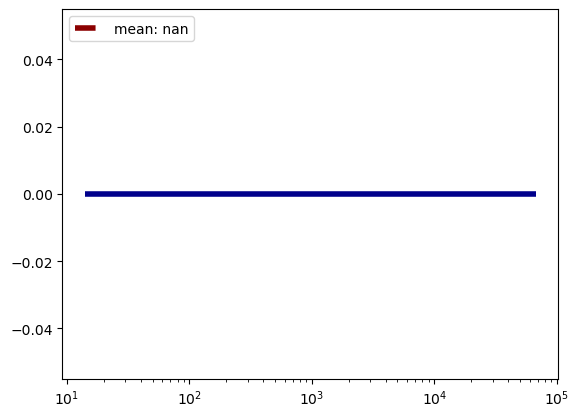

In [25]:
# We can change the number of bins, the color, and even the style of the histogram

# This function generates the positions of the bins
# for a logscale
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins)) 
    
plt.hist(incr_healed_per_days, 
         bins =logbins,  # Particularity: I give the logbins I created as bins
         histtype = 'step', # I can change the style of the histogram
         linewidth = 4, # I can change the width of the line of the histogram
         edgecolor = 'darkblue')

# I can still do many identical things as with the normal plots, with the logarithmic
# scale I can see new things
mean_value = np.mean(incr_healed_per_days)
plt.axvline(np.mean(incr_healed_per_days), color = 'darkred', linestyle = '--', 
            label = 'mean: '+str(mean_value), linewidth = 4)

plt.xscale('log')

plt.legend(loc = 'upper left')

Note: `plt.rcParams` is a dictionary that contains all the parameters that define the runtime configuration of matplotlib. You can always use this to check the possibilities regarding your figure format:

In [11]:
# Example:
plt.rcParams['xtick.labelsize'] = 16 # This does the same as plt.xticks(fontsize=16)

In [16]:
print(len(plt.rcParams.keys()), "config parameters found!") # There are hundreds of configuration parameters
# print(plt.rcParams.keys()) # You can take a look at all of them by uncommenting this line

304 config parameters found!
